# Making baseline predictions for time series forecasting 
* Source: https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

Establishing a baseline is essential on all time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem. 

Before you can establish a performance baseline on your forecast problem, you must develop a test harness. This is comprised of:
1. **Dateset**: what you intend to use to train and evaluate models.
2. **Resampling**: technique you intend to use to estimate the performance of the technique(e.g., train/test split)
3. **Performance measure**: what you intend to use to evaluate forecasts (e.g., mean squared error)

Three properties of a good technique for making a baseline forecast are:
* Simple: A method that requires little or no training or intelligence
* Fast: A method that is fast to implement and computationally trivial to make a prediction
* Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input. 

A common algorithm used in establishing a baseline performance is the persistence algorithm

## Persistence algorithm (the 'naive' forecast)
The most common baseline method for supervised ML is the Zero rule algorithm. This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. This could be used for time series, but does not respect the serial correlation structure in time series datasets. 

The equivalent technique for use with time series dataset is the persistence algorithm. 

The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the next time step (t+1).

In [23]:
import pandas as pd
from datetime import datetime 

def parser(x):
    return datetime.strptime(x, '%Y-%m')

filepath = '../data/AirPassengers.csv'
series = pd.read_csv('../data/AirPassengers.csv', header = 0, parse_dates=[0], index_col=0, squeeze =True, date_parser=parser)

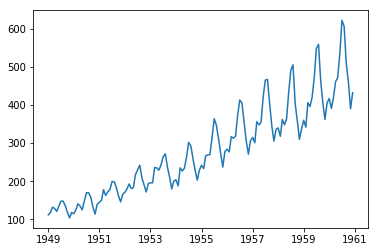

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(series)

Persistence model can be implemented easily in 4 steps:
1. Transform the univariate dataset into a supervised learning problem
2. Establish the train and test datasets for the test harness
3. Define the persistence model
4. Make a forecast and establish a baseline performance
5. Review the complete example and plot the output.

### 1. Define the supervised learning problem
The first step is to load the dataset and create a lagged representation. 

In [12]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis =1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(4))

     t-1  t+1
0    NaN  112
1  112.0  118
2  118.0  132
3  132.0  129


### 2. Train and test sets

In [14]:
X=dataframe.values
train_size=int(len(X)*0.66)
train,test=X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:, 1]
test_X, test_y = test[:,0], test[:, 1]

### 3. Persistence algorithm

In [15]:
def model_persistence(x):
    return x

### 4. Make and Evaluate forecaset

In [20]:
from sklearn.metrics import mean_squared_error

predictions=list()
for x in test_X:
    yhat=model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f'%test_score)

Test MSE: 2285.857


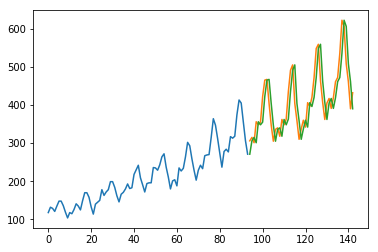

In [22]:
from matplotlib import pyplot
%matplotlib inline

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

The persistence algorithm is naive, and it is often called the *naive forecast*. It assumes nothing about the specifics of the time series problem to which it is applied.